In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-alcohol-consumption.csv', index_col=0)
df.head(2)

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours


In [3]:
df.shape

(395, 29)

### Visialize relationship between the number of absences students have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

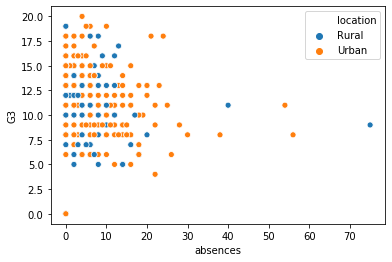

In [4]:
sns.scatterplot(x='absences', y='G3', data = df, hue = 'location', hue_order=['Rural', 'Urban'])

It looks like students with higher absenses tend to have lower grades in both rural and urban areas.

### How many students live in urban vs. rural areas, and does this vary based on what school the student attends?

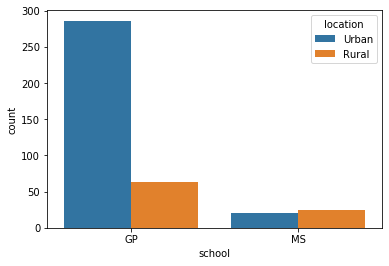

In [5]:
sns.countplot(x='school', data=df, hue='location')

tudents at GP tend to come from an urban location, but students at MS are more evenly split.

### Checking relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time 

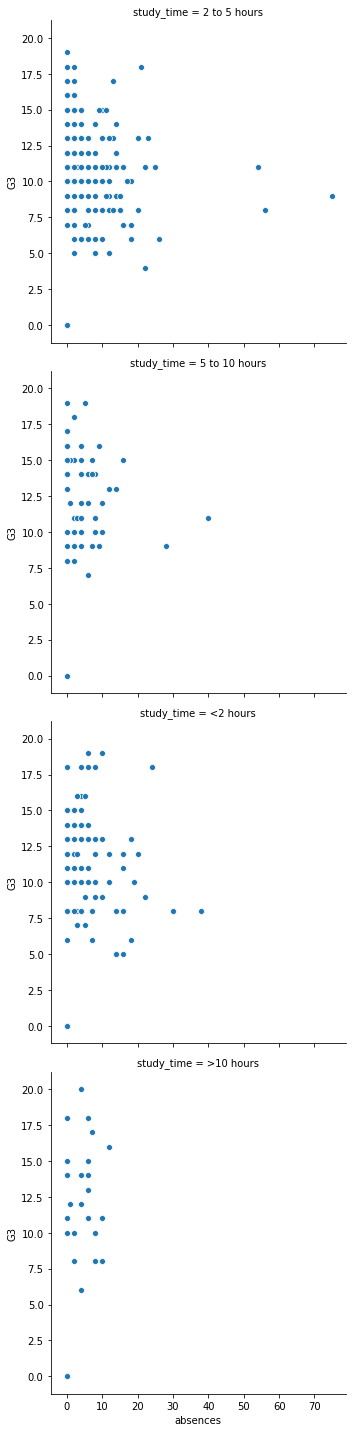

In [6]:
sns.relplot(x="absences", y="G3", data=df, kind="scatter", row='study_time')

### Does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

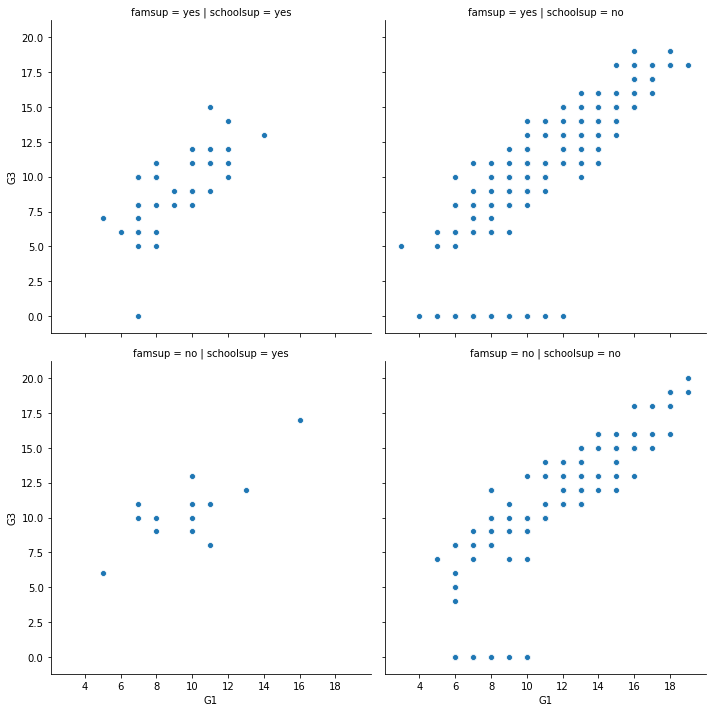

In [7]:
sns.relplot(x='G1', y='G3', data=df, kind='scatter', col='schoolsup', row='famsup', row_order=['yes', 'no'])

It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

### Do students who report higher amounts of studying tend to get better final grades?

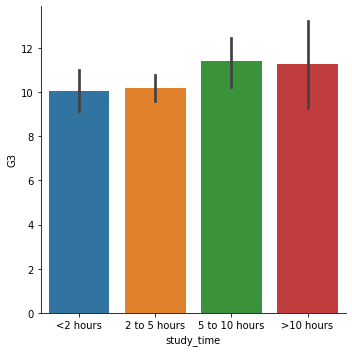

In [8]:
st_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]
sns.catplot(x='study_time', y='G3', data=df, kind='bar', order = st_order)

Students in above sample who studied more have a slightly higher average grade, but it's not a strong relationship.

### Relationship between studying and final grade by using a bar plot to compare the average final grade among students in different categories.

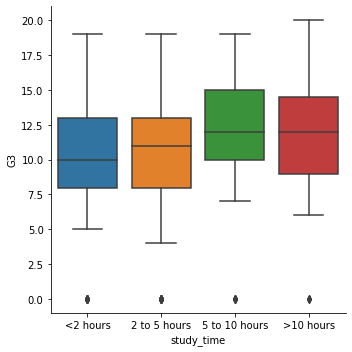

In [9]:
sns.catplot(x='study_time', y='G3', data=df, kind='box', order=st_order)

### Comparison the distribution of final grades between students who have internet access at home and those who don't

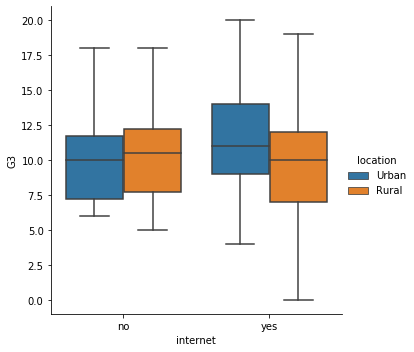

In [10]:
sns.catplot(x='internet', y='G3', data=df, kind='box', hue='location', sym='')

The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

### Comparison the distribution of final grades between students who are in a romantic relationship and those that are not.

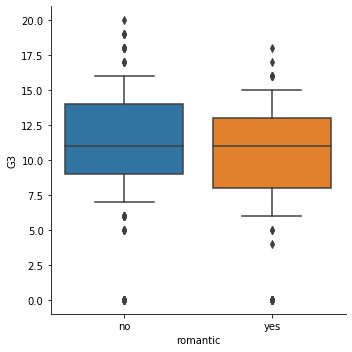

In [11]:
sns.catplot(x="romantic", y="G3", data=df, kind="box", whis=0.5)

The median grade is the same between these two groups, but the max grade is higher among students who are not in a romantic relationship.

### Does the quality of the student's family relationship influence the number of absences the student has in school?

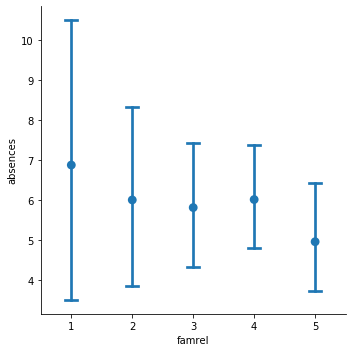

In [12]:
sns.catplot(x='famrel', y= 'absences', data=df, kind='point', capsize=0.2, join=False)

While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.

### Is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? 

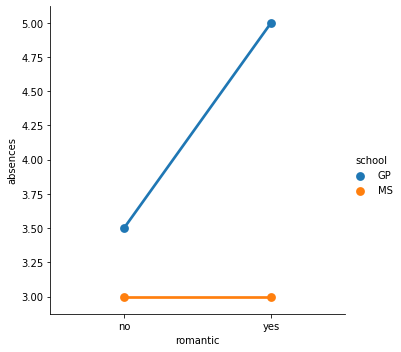

In [13]:
sns.catplot(x="romantic", y="absences", data=df, kind="point", hue="school", ci=None, estimator=np.median)

It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.